In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from knn import KNN

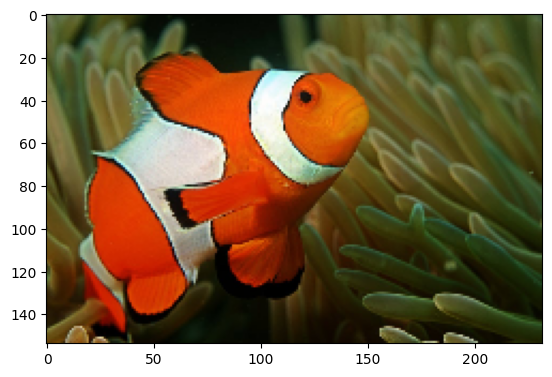

In [27]:
nemo = cv2.imread("input/nemo.jpg")
nemo = cv2.resize(nemo, (0, 0), fx=0.25, fy=0.25)
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [28]:
nemo.shape

(154, 232, 3)

In [29]:
pixels_list_rgb = nemo.reshape(-1, 3)
pixels_list_rgb.shape

(35728, 3)

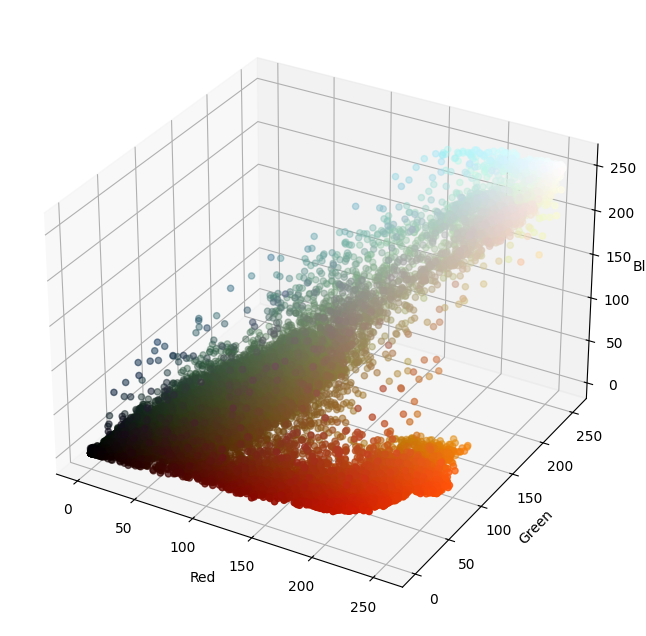

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_rgb[:, 0], pixels_list_rgb[:, 1], pixels_list_rgb[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

In [31]:
nemo_hsv = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)
pixels_list_hsv = nemo_hsv.reshape(-1, 3)
pixels_list_hsv

array([[ 41,  56, 122],
       [ 40,  71, 122],
       [ 39,  88, 113],
       ...,
       [ 33, 240,  35],
       [ 34, 240,  33],
       [ 35, 233,  34]], dtype=uint8)

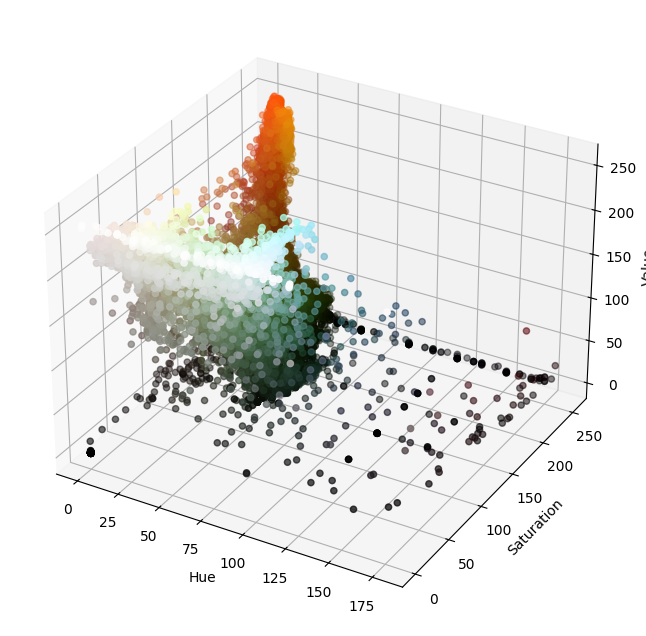

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(pixels_list_hsv[:, 0], pixels_list_hsv[:, 1], pixels_list_hsv[:, 2], c=pixels_list_rgb / 255)
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
plt.show()

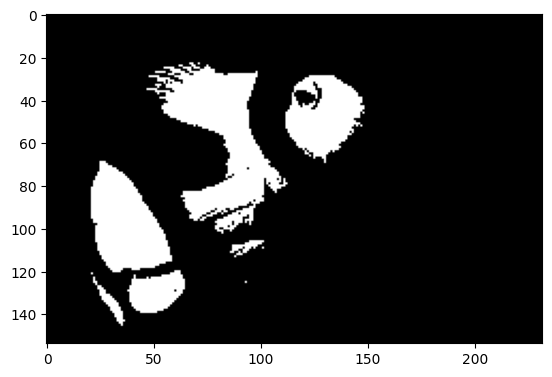

In [33]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

mask_orange = cv2.inRange(nemo_hsv, light_orange, dark_orange)
plt.imshow(mask_orange, cmap='gray')
plt.show()

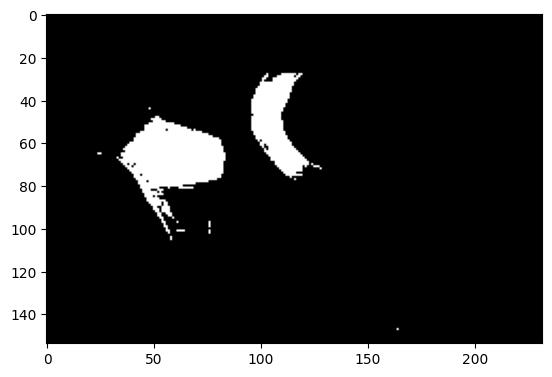

In [34]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(nemo_hsv, light_white, dark_white)
plt.imshow(mask_white, cmap='gray')
plt.show()

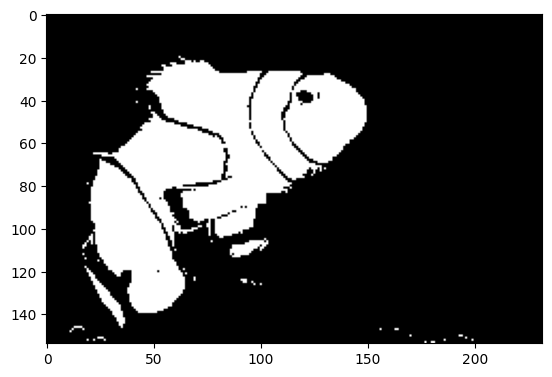

In [35]:
light_black = (0, 0, 0)
dark_black = (350,290,180)

mask_black = cv2.inRange(nemo_hsv, light_black, dark_black)
mask_black = cv2.bitwise_not(mask_black)
plt.imshow(mask_black, cmap='gray')
plt.show()

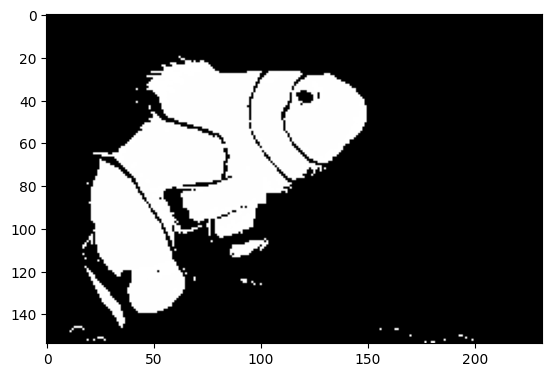

In [36]:
final_mask = mask_orange + mask_white + mask_black
plt.imshow(final_mask, cmap='gray')
plt.show()

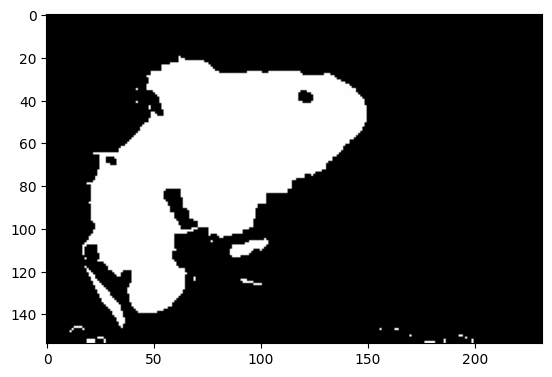

In [37]:
kernel = np.ones((3, 3), np.uint8)
image = cv2.dilate(final_mask , kernel, cv2.BORDER_TRANSPARENT) 
image = cv2.erode(image , kernel, cv2.BORDER_TRANSPARENT) 

plt.imshow(image , cmap="gray" )
plt.show()

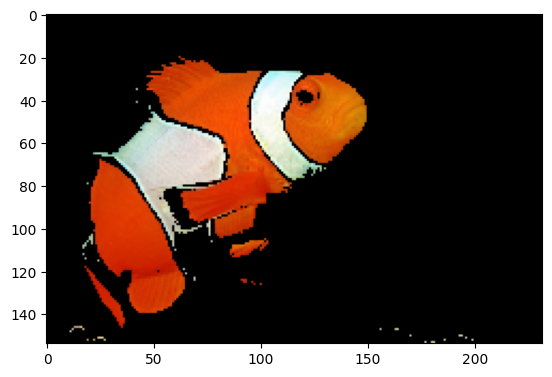

In [38]:
final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.imshow(final_result)
plt.show()

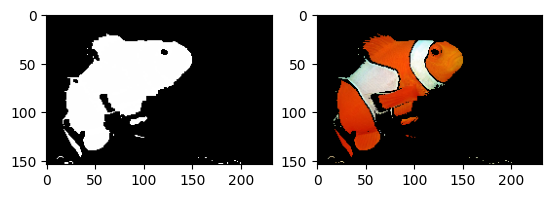

In [39]:
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [40]:
final_mask.shape

(154, 232)

In [41]:
X_train = pixels_list_hsv / 255
X_train.shape

(35728, 3)

In [42]:
Y_train = final_mask.reshape(-1,) // 255
Y_train.shape

(35728,)

In [43]:
Y_train[20000:20100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [44]:
knn = KNN(k=3)
knn.fit(X_train, Y_train)

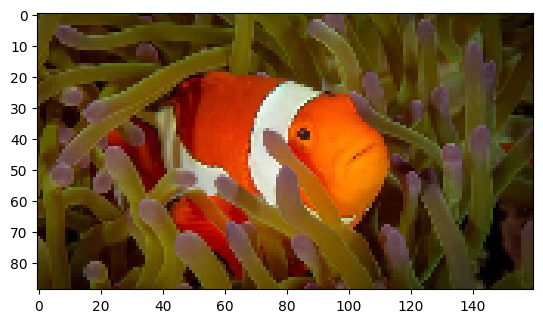

In [45]:
nemo_1 = cv2.imread("input/nemo_1.jpg")
nemo_1 = cv2.resize(nemo_1, (0, 0), fx=0.25, fy=0.25)
nemo_1 = cv2.cvtColor(nemo_1, cv2.COLOR_BGR2RGB)
plt.imshow(nemo_1)
plt.show()

In [47]:
nemo_1_hsv = cv2.cvtColor(nemo_1, cv2.COLOR_RGB2HSV)
nemo_1_hsv.shape

(89, 160, 3)

In [49]:
X_test = nemo_1_hsv.reshape(-1, 3) / 255
X_test.shape

(14240, 3)

In [ ]:
Y_pred = knn.predict(X_test)